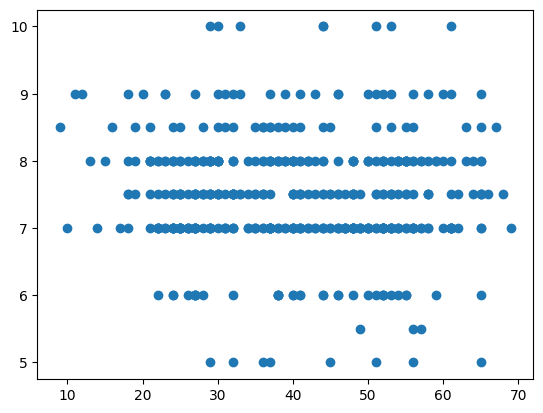

In [1]:
import pandas as pd 
import numpy as np
import scipy 
import scipy.stats
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.optimize import curve_fit
from scipy.stats import ttest_ind

df = pd.read_csv(".\datasets\Sleep_Efficiency.csv") 

age, sleep = df["Age"], df["Sleep duration"]
age, sleep = age.to_numpy(), sleep.to_numpy()
plt.plot(age, sleep, "o")
plt.show()
a = 0
b = 7
m = len(age)
global alpha 
alpha = 0.001

Згідно теми лабораторної роботи, ми припускаємо, що наш y(як стовпчик даних кількості годин сну) залежить від x(як стовпчик віку людей) у вигляді лінійної залежності. 
<br>
<font size="5" style="color:Orange">y=h(x) = ax + b</font>
<br>
Згідно графіка намальованого вище ми аналітично прийшли до висновку, що залежність між y та x описується у вигляді горизонтальної лінії
<font size="4" style="color:DodgerBlue">(y=0x+b)</font>, <br>отже ми бачимо, що наші початкові параметри - <font size="4" style="color:DodgerBlue">(a,b) = (0, 7.5)</font><br>
Загалом для збільшення точності параметрів використовується один з трьох методів градієтного спуску(власне сам градієнтний спуск, стохастичний градієнтний спуск та mini batch градієнтний спуск)
<br>Так як наш датасет містить невелику кількість записів, то ми можемо використатти власне градієнтний спуск для наглядності результатів, 
<br>і тепер за його допомогою збільшуємо точність наших параметрів використовучюи наступні формули:<p><img src="images/Screenshot_1.png"/></p><p><img src="images/Screenshot_2.png"/></p>
Параметри альфа з попередньої формули береться довільний для точності обчислення, дивлячись на об'єм вхідних даних; Так як наш датасет містить приблизно 1000 записів, то ми можем взяти достатньо точне значення альфа - 0.001

Аналітично дізналися що а = 0, b = 7.5

In [2]:
for i in range(1000):
    s1, s2 = 0, 0
    for i in range(m):
        s1 += (a*age[i] + b - sleep[i])*age[i]
        s2 += a*age[i] + b - sleep[i]
    s1, s2 = s1/m ,s2/m
    a = a - alpha * s1
    b = b - alpha * s2 

print(a, b)

0.008745312676838772 7.0581875036895925


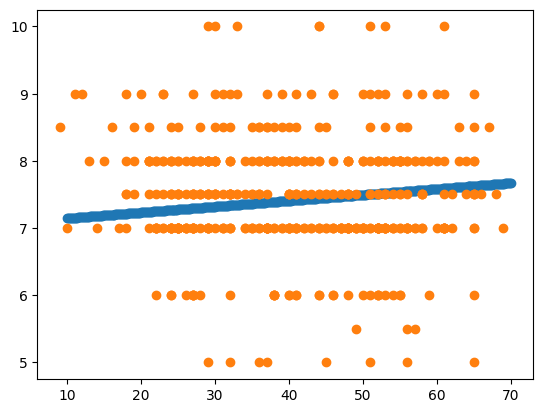

In [3]:
x = np.linspace(10, 70, m)
y = a*x + b
plt.plot(x, y, "o")
plt.plot(age, sleep, "o")
